In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.data.RedDotsData import RedDotsData
from lib.data.RedDotsManualData import RedDotsManualData
from lib.data.RedDotsRawData import RedDotsRawData
from lib.FolderStructure import FolderStructure
from lib.data.DriftData import DriftData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6236_19"
#rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
rootDir = "C:\workspaces\AnjutkaVideo\Antarctic_2020_AMK79\st6647"
videoFileName = "V4"


folderStruct = FolderStructure(rootDir, videoFileName)

drifts = DriftData.createFromFolderStruct(folderStruct)
maxFrameID = drifts.maxFrameID()
minFrameID = drifts.minFrameID()
#maxFrameID = 49
#minFrameID = 36281

redDotsManual = RedDotsManualData(folderStruct)
redDotsRaw = RedDotsRawData(folderStruct)

rdd = RedDotsData.createFromFolderStruct(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

445

In [2]:
df = rdd.getPandasDF()
#rdd.saveInterpolatedDFToFile(minFrameID, maxFrameID+1)
rdd.getCount()
#df.head(10)

445

In [3]:
#find dups
len(df[df.duplicated("frameNumber",keep=False)].index)

0

c:\old\python27\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


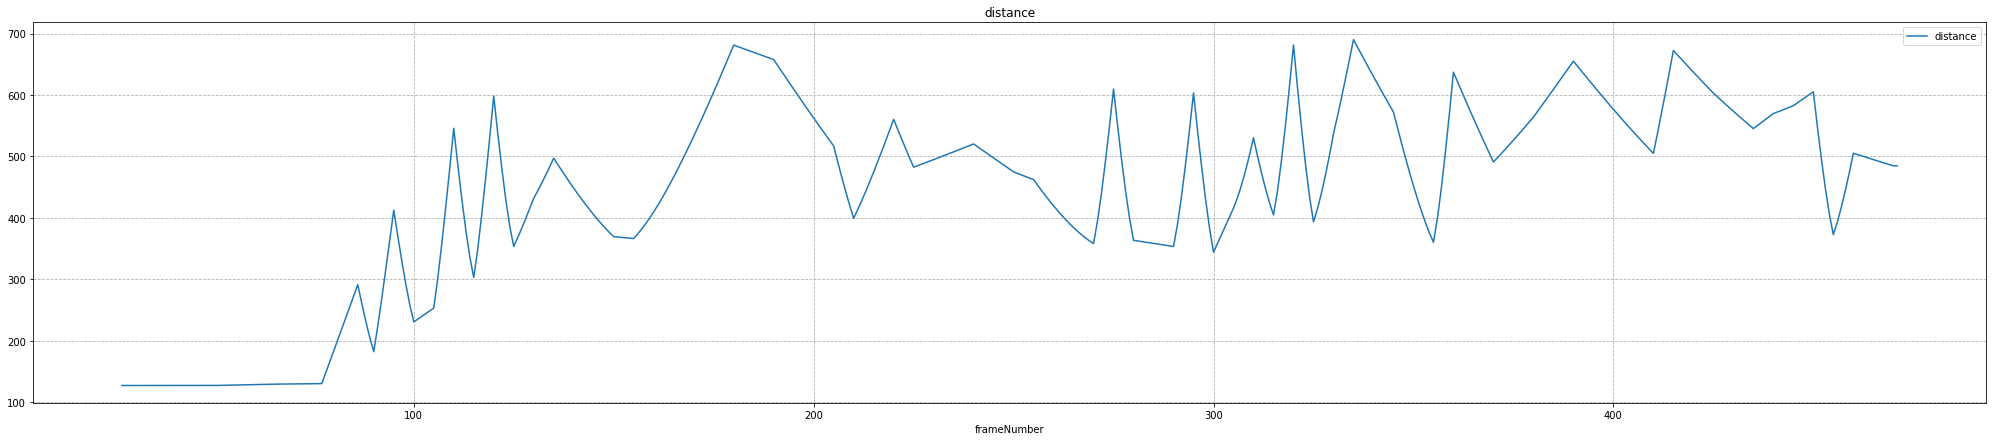

In [4]:
df.plot(x='frameNumber', y=['distance'],figsize=(35,7), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines
plt.savefig('C:/workspaces/AnjutkaVideo/Antarctic_2020_AMK79/st6647/V4/redDots_distance.png', format='png', dpi=300)

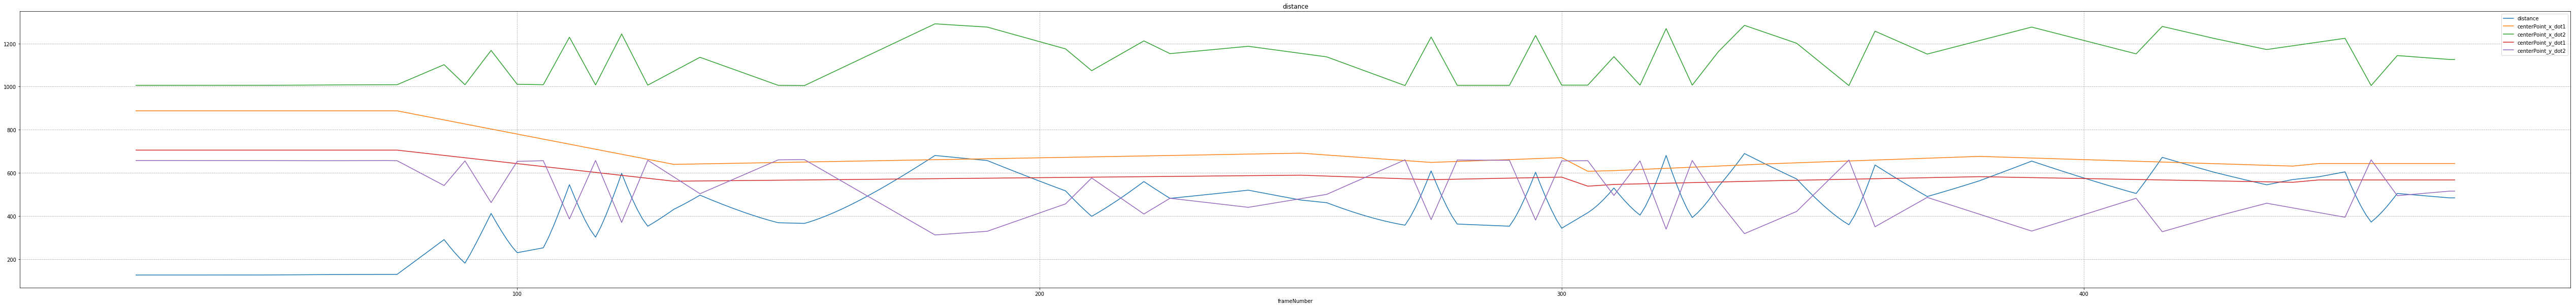

In [5]:
df.plot(x='frameNumber', y=['distance','centerPoint_x_dot1', 'centerPoint_x_dot2','centerPoint_y_dot1', 'centerPoint_y_dot2'],figsize=(90,10), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [6]:
manualDF = redDotsManual.getPandasDF().copy()
redDotsManual.getCount()

24

In [7]:
rawDF = redDotsRaw.getPandasDF().copy()
redDotsRaw.getCount()

59

In [8]:
dfToPlot = redDotsManual.forPlotting()
dfToPlot.count()[0] #head(10)

KeyError: 'frameNumber'

In [ ]:
lowerFrameID = minFrameID
upperFrameID = maxFrameID
#lowerFrameID = 49
#upperFrameID = 36281

#lowerFrameID = 4000
#upperFrameID = 6000
zoomDF = dfToPlot.loc[dfToPlot['frameNumber'] > lowerFrameID].loc[dfToPlot['frameNumber'] < upperFrameID]

In [ ]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot1'],figsize=(65,7), title="Dot 1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot2'],figsize=(45,7), title="Dot2: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot2 = redDotsManual.combinedOnlyRedDot2()
dataRedDot2.count()[0]

In [ ]:
#dataRedDot2 = replaceOutlierBetweenTwo(dataRedDot2, 'centerPoint_x')
dataRedDot1 = redDotsManual.combinedOnlyRedDot1()
dataRedDot1.count()[0]
#dataRedDot1['frameNumber']


In [ ]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="redDot1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="redDot1 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="dataRedDot2 X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="dataRedDot2 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_x_dot1','centerPoint_x_dot2'],figsize=(15,7), title="X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [ ]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_y_dot1','centerPoint_y_dot2'],figsize=(15,7), title="Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

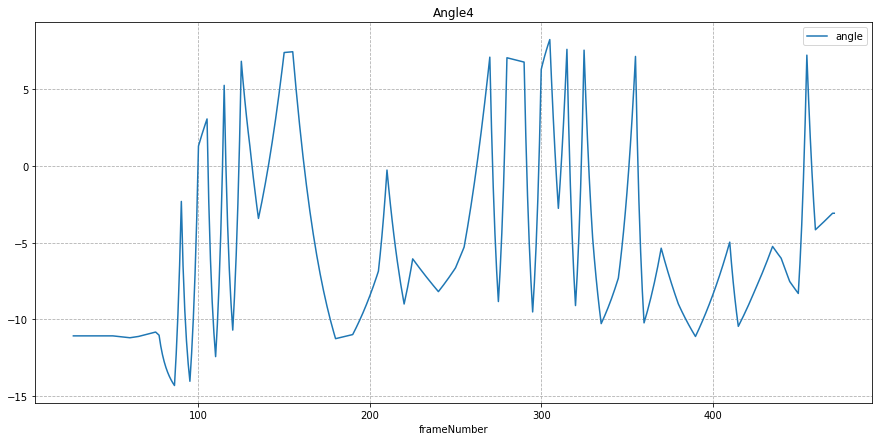

In [9]:
rd_data = RedDotsData(folderStruct)
df_intr = rd_data.getPandasDF()
#df_intr["yLength"] = (df_intr["centerPoint_y_dot1"] - df_intr["centerPoint_y_dot2"])
#df_intr["xLength"] = (df_intr["centerPoint_x_dot1"] - df_intr["centerPoint_x_dot2"])
#df_intr["tan_angle"] = df_intr["yLength"]/df_intr["xLength"]
#df_intr["angle"] = numpy.arctan(df_intr["tan_angle"])
#df_intr["angle_deg"] = numpy.arctan(df_intr["tan_angle"])/math.pi*90 


df_intr.plot(x='frameNumber', y=[ 'angle'],figsize=(15,7), title="Angle4")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines
plt.savefig('C:/workspaces/AnjutkaVideo/Antarctic_2020_AMK79/st6647/V4/redDots_angle.png', format='png', dpi=300)

In [ ]:
len(df_intr.index)

In [ ]:
df_intr.loc[df_intr['frameNumber'] > 1000].loc[df_intr['frameNumber'] < 1800].plot(x='frameNumber', y=['angle'],figsize=(15,7), title="Angle3")

In [ ]:
df_intr.loc[df_intr['frameNumber'] > 1400].loc[df_intr['frameNumber'] < 1500].plot(x='frameNumber', y=['distance'],figsize=(15,7), title="distance")


In [ ]:
df_intr.loc[df_intr['frameNumber'] > 0].loc[df_intr['frameNumber'] < 150000].plot(x='frameNumber', y=['distance'],figsize=(15,7), title="distance")

In [ ]:
numpy.percentile(df_intr["distance"], 99)

In [ ]:
numpy.percentile(df_intr["distance"], 50)

In [ ]:
numpy.percentile(df_intr["distance"], 1)

In [ ]:
numpy.percentile(df_intr["distance"], 98)

In [ ]:
numpy.percentile(df_intr["distance"], 95)


In [ ]:
numpy.percentile(df_intr["distance"], 5)

